In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os
from glob import glob

In [80]:
drone_model = "Phantom"
csv_folder = '/Users/carlos_1/Google Drive/My Drive/CPP/RFML - Mohammad Husain/notebooks/data'
csv_files = glob(os.path.join(csv_folder, "*" + drone_model + "*.csv"))

In [1]:
# create an array of dataframes.
# each dataframe containing iq samples from one file (one sigmf-data file)
num_rows = 1000
# nrows defines the number of rows to use. Normally these files 
# have around 156 million rows. It's best to cut it down to avoid over flowing the kernel
dfs = [pd.read_csv(f, nrows=num_rows) for f in csv_files] 
for df in dfs: 
    print(df)

NameError: name 'csv_files' is not defined

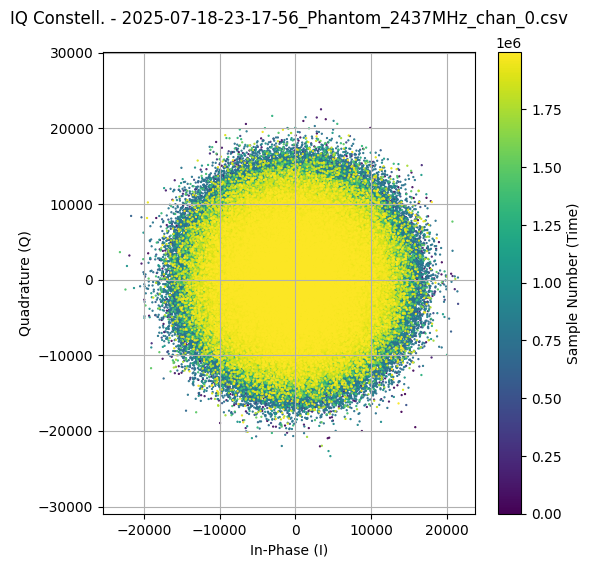

KeyboardInterrupt: 

In [ ]:
# plot each dataframe
# Scatter plot of IQ samples

output_dir = "/Users/carlos_1/Google Drive/My Drive/CPP/RFML - Mohammad Husain/notebooks/plots/"
os.makedirs(output_dir, exist_ok=True)

for f, df in zip(csv_files, dfs):
    # Assuming your CSV has columns named 'i' and 'q'
    x = df['i']
    y = df['q']
    t = df.index
    
    plt.figure(figsize=(6, 6))
    sc = plt.scatter(x, y, c=t, s=0.4, alpha=1)
    plt.colorbar(sc, label="Sample Number (Time)")
    plt.title(f"IQ Constell. - {os.path.basename(f)}", pad=20)
    plt.xlabel("In-Phase (I)")
    plt.ylabel("Quadrature (Q)")
    plt.grid(True)
    plt.axis('equal')

    # Save to file
    plt.savefig(os.path.join(output_dir, f"iq_plot_{os.path.basename(f).replace("csv", "png")}"), bbox_inches='tight', dpi=200)
    plt.show()
